   - Data around us: Tabular, Text, Image, Video, Audio.
   - Focus Area of Data Scientist: Data, Model, Training
   - AI Project / Research Framework

# Data Analysis & Decision-Making Process

1 Ask (Define the Question)

- This is basically a research or business question.
- Why does the problem occur?
- If we improve the company policy, will that solve the problem?

2 Prepare (Collect Data)

- Gather all the relevant data needed to answer the question.
- Data Sources: Databases (SQL) Excel APIs CSV files etc.
- 
3 Process (Clean and Organize Data)
  
-  Process the collected data to make it ready for analysis.
-  Handle missing values, remove duplicates, and correct errors.

4 Analyze (Explore and Visualize Data)

- Perform statistical and visual analysis.
- Visualization Techniques:
- Code-based: Seaborn, Matplotlib, Plotly
- No-code tools: Excel, Tableau, Power BI

5 Model (Build Predictive Models)

- Build models to predict outcomes and gain insights.
- Techniques:
- Machine Learning Algorithms
- Deep Learning Algorithms
- AI Algorithms

6 Share (Report and Present Findings)

- Communicate results in a clear and impactful way.
- Reporting Tools: PowerPoint, Canva

7 Act (Take Action)

- Take decisions and implement actions based on the analysis.

In [2]:
import pandas as pd
import os

root_dir =  "C:\\Users\\mrmdh\\OneDrive\\Desktop\\data_science\\pandas_2"
data_dir = os.path.join(root_dir, 'data')
dataset_path = os.path.join(data_dir, 'Class 20_health_monitor_data.csv')

In [3]:
# Read_data_from_csv_file\


health_monitor_data = pd.read_csv(dataset_path)
health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.1,Easy
1,60,'2020/12/02',117,145,479.0,Moderate
2,60,'2020/12/03',103,135,340.0,Moderate
3,45,'2020/12/04',109,175,282.4,Moderate
4,45,'2020/12/05',117,148,406.0,Heavy


In [4]:
# 1_Understand_the_structure_of_the_dataset

health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  33 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     33 non-null     int64  
 3   Maxpulse  33 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      33 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [5]:
health_monitor_data['Type'].value_counts()

Type
Moderate    15
Heavy       14
Easy         4
Name: count, dtype: int64

Data Cleaning: Handle missing values

- Approach 1: Remove rows (When the dataset is large enough)
- Approach 2: Impute missing values (When the dataset is small)


In [6]:

mask = health_monitor_data.isnull().any(axis=1)
print(mask)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32    False
dtype: bool


In [7]:
health_monitor_data[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
18,45,'2020/12/18',90,112,NaN,Moderate
22,45,NaN,100,119,282.0,Moderate
28,60,'2020/12/28',103,132,NaN,Heavy


In [8]:
average_cal = health_monitor_data['Calories'].mean()
print('Average calories: {}'.format(average_cal))

Average calories: 302.93870967741935


In [9]:
health_monitor_data['Calories']=health_monitor_data['Calories'].fillna(
    value=average_cal
)

health_monitor_data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.10000,Easy
1,60,'2020/12/02',117,145,479.00000,Moderate
2,60,'2020/12/03',103,135,340.00000,Moderate
3,45,'2020/12/04',109,175,282.40000,Moderate
4,45,'2020/12/05',117,148,406.00000,Heavy
5,60,'2020/12/06',102,127,300.00000,Easy
6,60,'2020/12/07',110,136,374.00000,Moderate
7,450,'2020/12/08',104,134,253.30000,Moderate
8,30,'2020/12/09',109,133,195.10000,Heavy
9,60,'2020/12/10',98,124,269.00000,Moderate


In [10]:
mask = health_monitor_data.isnull().any(axis=1)
health_monitor_data[ mask  ]

,Duration,Date,Pulse,Maxpulse,Calories,Type
22,45,NaN,100,119,282.0,Moderate


Remove null rows
1. Filtering: health_monitor_data = health_monitor_data[~mask]
2. dropna: removes the null rows


In [11]:
health_monitor_data = health_monitor_data.dropna()
health_monitor_data.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
Type        0
dtype: int64

In [12]:
health_monitor_data.head(33)

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.10000,Easy
1,60,'2020/12/02',117,145,479.00000,Moderate
2,60,'2020/12/03',103,135,340.00000,Moderate
3,45,'2020/12/04',109,175,282.40000,Moderate
4,45,'2020/12/05',117,148,406.00000,Heavy
5,60,'2020/12/06',102,127,300.00000,Easy
6,60,'2020/12/07',110,136,374.00000,Moderate
7,450,'2020/12/08',104,134,253.30000,Moderate
8,30,'2020/12/09',109,133,195.10000,Heavy
9,60,'2020/12/10',98,124,269.00000,Moderate


- Remove duplicate

R1
R2
R3
R1
R5

duplicated(): mask = [False, False, False, True, False]


In [13]:
mask = health_monitor_data.duplicated()
print(mask)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
dtype: bool


In [14]:
health_monitor_data[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
32,60,'2020/12/12',100,120,250.7,Heavy


In [15]:
health_monitor_data = health_monitor_data.drop_duplicates()

In [16]:
print(f"No of duplicate rows: {health_monitor_data.duplicated().sum()}")

No of duplicate rows: 0


In [17]:
# Convert_data_types

health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     31 non-null     int64  
 3   Maxpulse  31 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      31 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.7+ KB


In [18]:
health_monitor_data['Date'] = health_monitor_data['Date'].astype('datetime64[ns]')
health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  31 non-null     int64         
 1   Date      31 non-null     datetime64[ns]
 2   Pulse     31 non-null     int64         
 3   Maxpulse  31 non-null     int64         
 4   Calories  31 non-null     float64       
 5   Type      31 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [19]:
health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,2020-12-01,110,130,409.1,Easy
1,60,2020-12-02,117,145,479.0,Moderate
2,60,2020-12-03,103,135,340.0,Moderate
3,45,2020-12-04,109,175,282.4,Moderate
4,45,2020-12-05,117,148,406.0,Heavy


""" Remove outliers

InterQuartile Range (IQR)

IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
R = Q3 + 1.5 * IQR

Any values outside L and R is called outliers.
"""

In [20]:
health_monitor_data.describe()

,Duration,Date,Pulse,Maxpulse,Calories
count,31.000000,31,31.000000,31.000000,31.000000
mean,69.193548,2020-12-15 16:15:29.032258048,103.612903,128.806452,305.299272
min,30.000000,2020-12-01 00:00:00,90.000000,101.000000,195.100000
25%,60.000000,2020-12-08 12:00:00,100.000000,120.000000,250.700000
50%,60.000000,2020-12-15 00:00:00,103.000000,128.000000,300.000000
75%,60.000000,2020-12-23 12:00:00,107.000000,132.500000,342.650000
max,450.000000,2020-12-31 00:00:00,130.000000,175.000000,479.000000
std,71.064487,NaN,7.935899,13.095596,64.760652


In [21]:
Q1 = health_monitor_data['Pulse'].quantile(0.25)
print(Q1)

Q3 = health_monitor_data['Pulse'].quantile(0.75)
print(Q3)

IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
R = Q3 + 1.5 * IQR
print(f"Inter quartile range for Pulse is [{L}, {R}]")

100.0
107.0
Inter quartile range for Pulse is [89.5, 117.5]


In [22]:
non_outlier_mask = health_monitor_data['Pulse'].between(L, R)
outlier_mask = ~non_outlier_mask

health_monitor_data[outlier_mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
23,60,2020-12-23,130,101,300.0,Heavy


In [23]:
health_monitor_data = health_monitor_data[non_outlier_mask]
health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,2020-12-01,110,130,409.1,Easy
1,60,2020-12-02,117,145,479.0,Moderate
2,60,2020-12-03,103,135,340.0,Moderate
3,45,2020-12-04,109,175,282.4,Moderate
4,45,2020-12-05,117,148,406.0,Heavy


In [24]:
# Exploratory_Data_Analysis

health_monitor_data.describe()

,Duration,Date,Pulse,Maxpulse,Calories
count,30.000000,30,30.000000,30.000000,30.000000
mean,69.500000,2020-12-15 10:24:00,102.733333,129.733333,305.475914
min,30.000000,2020-12-01 00:00:00,90.000000,112.000000,195.100000
25%,60.000000,2020-12-08 06:00:00,100.000000,120.750000,250.700000
50%,60.000000,2020-12-14 12:00:00,102.500000,128.500000,300.000000
75%,60.000000,2020-12-23 06:00:00,105.750000,132.750000,343.975000
max,450.000000,2020-12-31 00:00:00,117.000000,175.000000,479.000000
std,72.258516,NaN,6.351396,12.241629,65.860156


<Axes: ylabel='Frequency'>

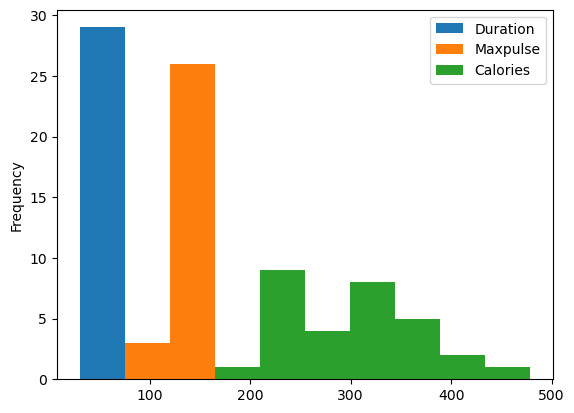

In [25]:
health_monitor_data.plot(
    kind='hist',
    x='Pulse'
)

- Feature engineering
- Select the most relevant features by experience or applying feature selection methods 


In [26]:
health_monitor_data = health_monitor_data.drop(columns=['Date'])
health_monitor_data.head()

,Duration,Pulse,Maxpulse,Calories,Type
0,60,110,130,409.1,Easy
1,60,117,145,479.0,Moderate
2,60,103,135,340.0,Moderate
3,45,109,175,282.4,Moderate
4,45,117,148,406.0,Heavy


Data Transformation 

- Numeric: We need to normalize out data
- Categorical: We need to encode categorical data


In [27]:
def normalize(col):
    """
    z-normalization, (zero mean, unit variance)
    :param col: 
    :return: 
    """
    mean = col.mean()
    std = col.std()
    return (col - mean) / std

health_monitor_data['Pulse'] = health_monitor_data['Pulse'].agg(normalize)
health_monitor_data["Maxpulse"] = health_monitor_data["Maxpulse"].agg(normalize)
health_monitor_data['Duration'] = health_monitor_data['Duration'].agg(normalize)
health_monitor_data['Calories'] = health_monitor_data['Calories'].agg(normalize)

health_monitor_data.head()

,Duration,Pulse,Maxpulse,Calories,Type
0,-0.131472,1.144105,0.021784,1.573396,Easy
1,-0.131472,2.246225,1.247111,2.634735,Moderate
2,-0.131472,0.041986,0.430226,0.524203,Moderate
3,-0.339060,0.986660,3.697765,-0.350377,Moderate
4,-0.339060,2.246225,1.492176,1.526326,Heavy


Encoding categorical data 

- One Hot Encoding (using pandas and sklearn)
- Label Encoding


In [28]:
health_monitor_data["Type"].value_counts()

Type
Moderate    14
Heavy       12
Easy         4
Name: count, dtype: int64

In [ ]:
""" One hot encoding 
Category: Type
Values: Moderate, Heavy, Easy

Moderate => [1, 0, 0]
Heavy => [0, 1, 0]
Easy => [0, 0, 1]

Classification of birds: Bird1, Bird2, Bird3

X => Model() => y_pred = [0.75, 0, 0.25]      y_true = [1, 0, 0]
"""

In [29]:
health_monitor_data_one_hot_encoded = pd.get_dummies(
    health_monitor_data,
    columns=["Type"],
    sparse=True
)

health_monitor_data_one_hot_encoded.head()

,Duration,Pulse,Maxpulse,Calories,Type_Easy,Type_Heavy,Type_Moderate
0,-0.131472,1.144105,0.021784,1.573396,True,False,False
1,-0.131472,2.246225,1.247111,2.634735,False,False,True
2,-0.131472,0.041986,0.430226,0.524203,False,False,True
3,-0.339060,0.986660,3.697765,-0.350377,False,False,True
4,-0.339060,2.246225,1.492176,1.526326,False,True,False


In [ ]:
""" Label Encoding 
Category: Type
Values: Moderate, Heavy, Easy

Moderate: 2
Heavy: 3
Easy: 1
"""

In [30]:
health_monitor_data['label_encoded_type'] = pd.Categorical(
    health_monitor_data['Type'],
    categories=['Easy', 'Moderate', 'Heavy'],
    ordered=True
).codes
health_monitor_data.head()

,Duration,Pulse,Maxpulse,Calories,Type,label_encoded_type
0,-0.131472,1.144105,0.021784,1.573396,Easy,0
1,-0.131472,2.246225,1.247111,2.634735,Moderate,1
2,-0.131472,0.041986,0.430226,0.524203,Moderate,1
3,-0.339060,0.986660,3.697765,-0.350377,Moderate,1
4,-0.339060,2.246225,1.492176,1.526326,Heavy,2
